In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def constellation_diagram(x, station):
    plt.figure(figsize = (8,8), facecolor = 'w')
    plt.plot(x.real, x.imag, '.', alpha = 0.1)
    plt.title(f'Constellation diagram ({station})')
    plt.xlabel('I')
    plt.ylabel('Q')
    plt.axis('equal')
    plt.xlim([-2.5,2.5])
    plt.ylim([-2.5,2.5])
    
def mer_dB(x, ref, print_check = False):
    constellation = np.sqrt(2)*np.exp(2*np.pi*1j*(np.arange(4) + 0.5)/4)
    data = constellation[np.argmin(np.abs(ref.reshape((-1,1)) - constellation.reshape((1,-1))), axis = 1)]
    if print_check:
        print('Correlation (check)', np.average(x * np.conj(data)))
    err = np.abs(x-data)
    P_signal = 2
    P_error = np.average(np.abs(err)**2)
    return 10 * np.log10(P_signal/P_error)

def plot_mer(c, ref, sel, station, avg = 500):
    x = np.empty(np.max(sel)+1, dtype = 'complex64')
    y = np.empty(np.max(sel)+1, dtype = 'complex64')
    x[:] = np.nan
    y[:] = np.nan
    x[sel] = c[sel]
    y[sel] = ref[sel]
    x = x[:x.size//avg*avg].reshape((-1,avg))
    y = y[:ref.size//avg*avg].reshape((-1,avg))
    plt.plot(np.arange(x.shape[0])*avg/500, [mer_dB(xx,yy) for xx,yy in zip(x, y)], label = station)

In [3]:
sel1 = np.arange(2000,113000)
sel2 = np.arange(129000,275000)
sels = (sel1, sel2)
sels_concat = np.concatenate(sels)
wakayama = np.concatenate(([0]*3, np.fromfile('data/wakayama_constellation.c64', dtype = 'complex64')))
wakayama[sel2[0]:-13] = wakayama[sel2[0]+13:]
shahe = np.concatenate(([0]*3, np.fromfile('data/shahe_constellation.c64', dtype = 'complex64')))
shahe[sel2[0]:-13] = shahe[sel2[0]+13:]
dwingeloo = np.fromfile('data/dwingeloo_constellation.c64', dtype = 'complex64')

In [4]:
print(np.argmax(np.abs(np.correlate(wakayama[sel1][:1000], dwingeloo[sel1][:1000], mode = 'full'))))
print(np.argmax(np.abs(np.correlate(wakayama[sel2][:1000], dwingeloo[sel2][:1000], mode = 'full'))))
print(mer_dB(wakayama[sel1], dwingeloo[sel1], True))
print(mer_dB(wakayama[sel2], dwingeloo[sel2], True))
print(np.argmax(np.abs(np.correlate(shahe[sel1][:1000], dwingeloo[sel1][:1000], mode = 'full'))))
print(np.argmax(np.abs(np.correlate(shahe[sel2][:1000], dwingeloo[sel2][:1000], mode = 'full'))))
print(mer_dB(shahe[sel1], dwingeloo[sel1], True))
print(mer_dB(shahe[sel2], dwingeloo[sel2], True))

999
999
Correlation (check) (2.0372628626881237+0.012693298849965463j)
12.74077440798824
Correlation (check) (2.046149903548449+0.0075535707119647605j)
12.028821588131551
998
940
Correlation (check) (1.9607974125937522+0.011630170603800437j)
5.874158340768895
Correlation (check) (1.852495868431453+0.012098161040855347j)
4.622524450035046


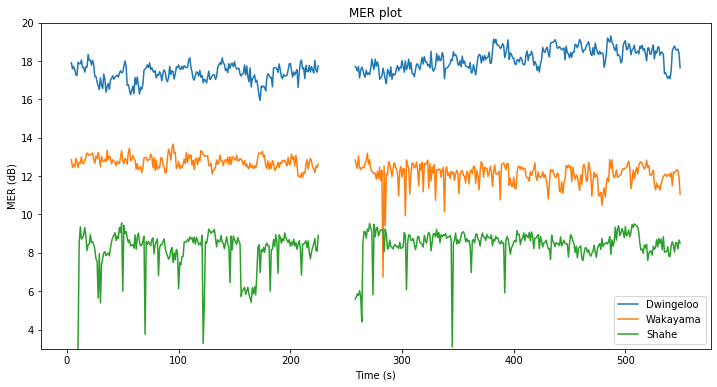

In [5]:
plt.figure(figsize = (12,6), facecolor = 'w')
plot_mer(dwingeloo, dwingeloo, sels_concat, 'Dwingeloo')
plot_mer(wakayama, dwingeloo, sels_concat, 'Wakayama')
plot_mer(shahe, shahe, sels_concat, 'Shahe')
plt.title(f'MER plot')
plt.xlabel('Time (s)')
plt.ylabel('MER (dB)')
plt.legend()
plt.ylim([3,20]);

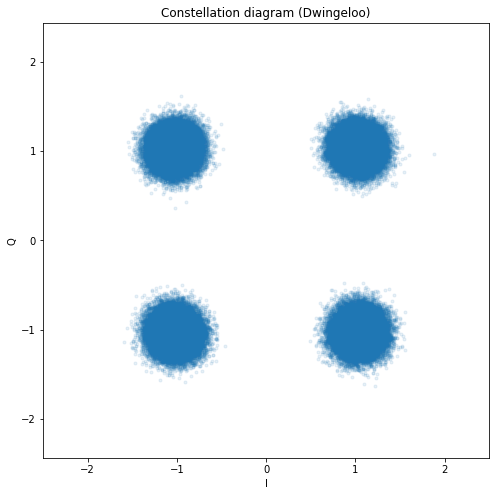

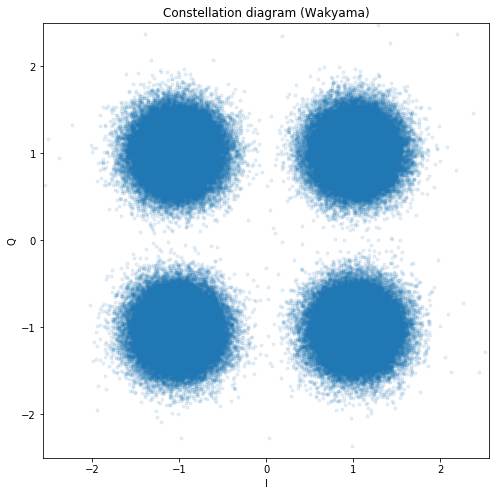

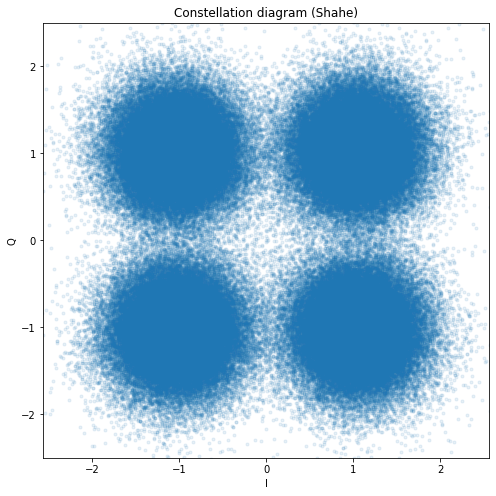

In [6]:
constellation_diagram(dwingeloo[sels_concat], 'Dwingeloo')
constellation_diagram(wakayama[sels_concat], 'Wakyama')
constellation_diagram(shahe[sels_concat][3500:], 'Shahe')